<a href="https://colab.research.google.com/github/Neha-Seirah/ML-Activities-/blob/main/MLLabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


DATA LOADED

In [ ]:
df=pd.read_csv('/content/2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df.shape

(158, 12)

In [ ]:
df.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

**THERE ARE 158 ROWS AND 12 COLUMNS**

CHECKING FOR MISSING VALUES

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**NONE OF THE VALUES ARE MISSING**

BINNING FOR HAPPINESS SCORE

In [ ]:
 h_bins=[7.427,7.527,7.561,7.584,7.587, float('inf')]
happy_labels=['< 7.427 ','<=7.561', '<7.585']
df['happyscore']=pd.cut(df['Happiness Score'],bins=h_bins,labels=happy_labels,right=False)
print(df[['Happiness Score','happyscore']])


ValueError: ignored

ONE HOT ENCODING ON REGION

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Region"])

print(df_encoded)

         Country  Happiness Rank  Happiness Score  Standard Error  \
0    Switzerland               1            7.587         0.03411   
1        Iceland               2            7.561         0.04884   
2        Denmark               3            7.527         0.03328   
3         Norway               4            7.522         0.03880   
4         Canada               5            7.427         0.03553   
..           ...             ...              ...             ...   
153       Rwanda             154            3.465         0.03464   
154        Benin             155            3.340         0.03656   
155        Syria             156            3.006         0.05015   
156      Burundi             157            2.905         0.08658   
157         Togo             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                

COVARIANCE MATRIX

In [ ]:

a = df['Family']
category_columns = df[['Health (Life Expectancy)']]

# Calculate the covariance matrix
covariance_matrix = np.cov(a, category_columns, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[0.07418492 0.03574136]
 [0.03574136 0.06104742]]


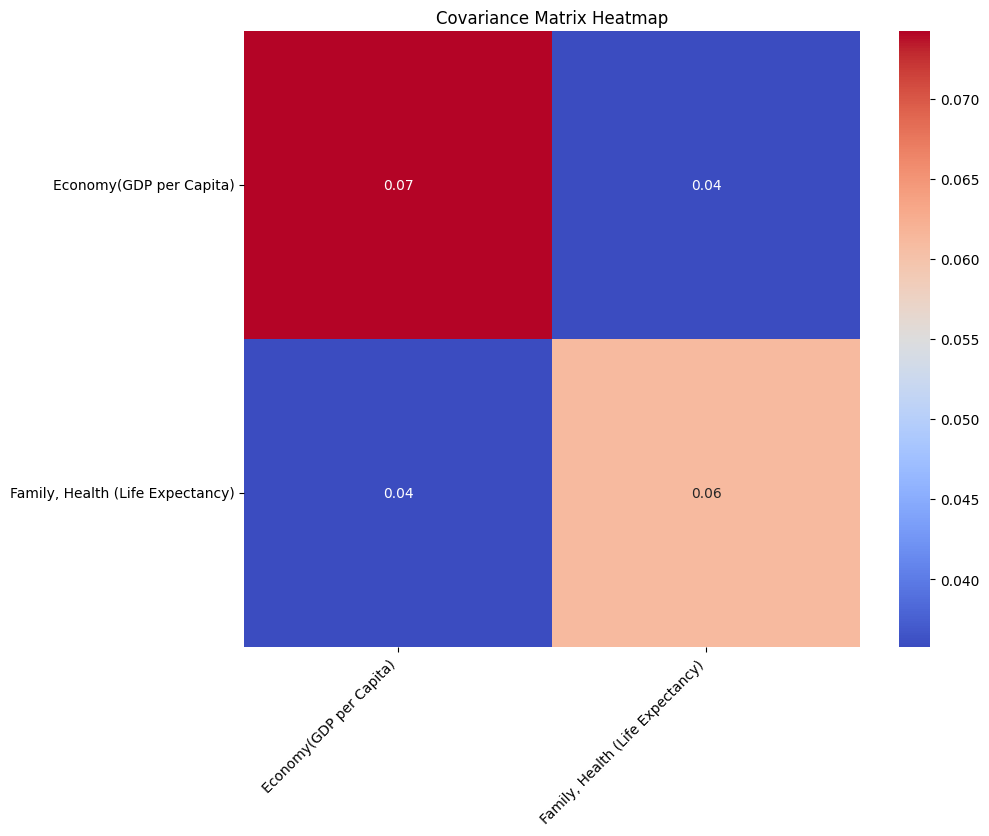

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ['Economy(GDP per Capita)', 'Family, Health (Life Expectancy)']


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)

plt.title("Covariance Matrix Heatmap")
plt.show()


CHI SQUARE TEST

label encoding needed to performed to covert categorical values to numeric values

In [40]:
from sklearn.preprocessing import LabelEncoder
for col in['Country','Region']:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

<Axes: >

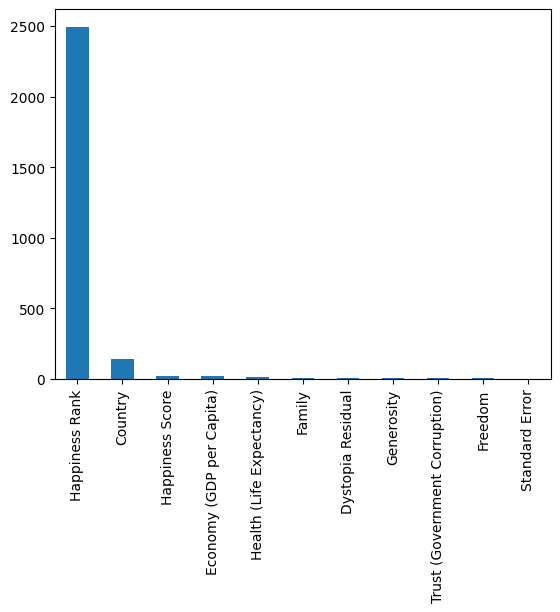

In [41]:
from sklearn.feature_selection import chi2
x=df.drop(columns=['Region'])
y=df['Region']


chi_scores=chi2(x,y)
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()